# Modeling and simulation with partial differential equations
### Linnéuniversitetet
Student: Fill in name of all members and student codes

## Instructions

The purpose of this computer lab is to asses the approximation properties of global functions in different scenarios. Particularly, we look at best approximations and the approximation of solutions to Boundary Value Problems (BVP) by using Galerkin methods. 

Throughout the exercises of the lab, we revisit the exact solutions for time independent cases of conduction of heat, transport and diffusion of pollutants, and propagation of waves. Using exact solutions allow us to test the approximation quality of global functions in these model cases.

Additionally, we derive variational formulations and compute Galerkin approximations to the BVPs. We compare the approximation with the exact solution and with the best approximation.

The student is expected to present solutions to all excercises in the notebook and motivate answers by showing derivations in detail and submitting Python scripts.
 
You are required to submit solutions to all the exercises presented in this notebook.
**The deadline for hand in your solutions is Friday October 6th**.

**Reference book:** Introduction to Numerical Methods for Variational problems, Hans Petter Langtangen, Kent-Andre Mardal, 2018

## Computer lab 3: Approximation properties with global functions

## Test cases:

In this computer lab we will be using models described in the lectures and in the last computer lab.
In particular we will use the exact solutions given in the computer lab 2.

The test cases that we will revise are the following:

### **Poisson's equation**:

**1)** $$ -\frac{d}{dx}\left(k \frac{du}{dx}\right)=1,\,\,x\in (0,1),\,\,u(0)=0,\,\,u(1)=0,$$
with
$$k(x)=\left\{
\begin{array}{cc}
1, & 0\leq x \leq 1/2 \\ 
\sigma, & 1/2 < x \leq 1
\end{array}\right.,$$

for $\sigma=1,2,5,10$. 
 
### **Advection diffusion**:

**2)** $$-d u''+u'=1,\,\,x\in(0,1)\,\,\text{and}\,\,u(0)=u(1)=0,$$ 
for $d=1,0.25,0.1,0.01$.

### **Helmholtz equation**:

**3)** $$-u''-\omega^2 u = x,\,\,u(0)=u(1)=0,$$
with solution 
$$u(x)=\frac{1}{\omega^2}\left(x-\frac{\sin \omega x}{\sin \omega}\right).$$

### Exercise 1: 

**1)** Verify by dierct differentiation that the solution $u(x)$ for the given Helmholtz equation is a solution to the BVP (3).

**2)** For what values of $\omega$ the solution $u(x)$ in (3) does not make sense?

## Verification of differentiation by using Finite Differences

For a continuous function $f$, we define the central difference formula as
$$D_0 f(x):=\frac{f(x+h)-f(x-h)}{2h}.$$
It is particularly useful in the case when we want to verify numerically formulas for derivatives.
In the next exercise we study the convergence rate of the residual $E_h(x):=|D_0 f(x)-f'(x)|$ for small $h$.

### Exercise 2:
For the functions a) $f(x)=\sin x,\,\,$ b) $f(x)=\frac{x}{1+x^2}$:

**1)** Write down the exact formula for $f'(x)$ for each given function (a-b). 


**2)** For $x=0.3$, compute $E_h(x):=|D_0 f(x)-f'(x)|$ for $h=0.1,0.01,0.001$ and generate a table with your results.

**3)** From the data obtained in **(2)**, assume the asymptotic behavior $E_h<ch^m$ for an arbitrary constant $c>0$. Can you compute the rate of convergence $m$ from your table **(2)**? Motivate your answer.

## Fourier series

We define the set of $N+1$ global basis functions as
$$\psi_i(x)=\sin((i+1)\pi x),\,\,i=0,1,\ldots,N.$$
Notice that these functions satisfy $\psi_i(0)=\psi_i(1)=0$.

### Exercise 3:
**1)** Write a code implementing a function `Sinfun(i,x)` for evaluating $\psi_i(x)$.

**2)** Use $N=4$ and for $x\in[0,1]$ plot $\psi_i(x),$ $i=0,1,\ldots,N$. 

**3)** Derive a formula for evaluating $\tfrac{d}{dx}\psi_i(x)$, and implement it in a function `dSinfun(i,x)`.

**4)** Particularly, from your `Sinfun(i,x)` and `dSinfun(i,x)` write functions `Psi(i,N,x)` and `dPsi(i,N,x)` defining $\psi_i(x)$ and $\tfrac{d}{dx}\psi_i(x)$.

In [1]:
# Osäker på skillnad mellan Sinfun och Psi, är den ena symbolisk?

0
1
2
3
4


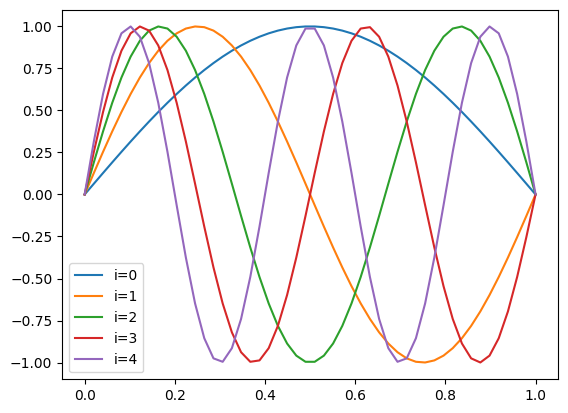

In [19]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import sympy as sp
x = np.linspace(0,1)
N = 4
def Sinfun(i,x):
    for i in range(i+1):
        fun = np.sin((i+1)*np.pi*x)
        plt.plot(x,fun,label=f'i={i}')
    plt.legend()
    plt.plot()
Sinfun(N,x)

In [ ]:
def dSinfun(i,x):
    df = (i+1)**np.pi*np.cos((i+1)*(np.pi)*x)
    return df


## Bernstein Polynomials


Let the Bernstein polynomials be defined as
$$B_i^n(x):=\left(
\begin{array}{c}
n \\
i
\end{array}
\right) x^i (1-x)^{n-i},\,\, i=0,1,\ldots,n.$$
where the constant $\left(\begin{array}{c}
n \\
i
\end{array}\right)$ is the binomial coefficient
(see section 2.4.3 in the reference book).

### Exercise 4:
**1)** Implement a code for evaluating $B_i^n(x)$ as a function `Bernstein(i,n,x)`. Hint: study the code given in section 2.5 in the reference book. 

**2)** Use $n=6$ and reproduce a similar plot as Figure 2.16 in the reference book. 

**3)** Let there be $N+1$ functions satisfying $B_i^n(0)=B_i^n(1)=0$.
For a given $n$, write a formula for the value of $N$. For what values of the index $i$, do the $B_i^n$ satisfy the boundary conditions?
We will use this resulting set of functions for our approximation schemes.

**4)** Derive formulas for evaluating $\tfrac{d}{dx}B_i^n(x)$, and implement them in a function `dBernstein(i,n,x)`. Hint: make sure that your derivation is correct by comparing with a central Difference formula. Use $h=0.01$ and evaluate at $x=\sqrt{2}/2$ the residual
$$E_h(x)=\left|\tfrac{d}{dx}B_i^n(x)-D_0 B_i^n(x)\right|.$$ 
For a correct formula the residual $E_h(x)\approx\mathcal{O}(h^2)$.

**5)** Define $N+1$ global basis functions $\psi_i(x)$ satisfying $\psi_i(0)=\psi_i(1)=0$ with index $i=0,1,\ldots,N$. For this, use your implementation for $B_i^n(x)$. Particularly, from your `Bernstein(i,n,x)` and `dBernstein(i,n,x)` write functions `Psi(i,N,x)` and `dPsi(i,N,x)` defining $\psi_i(x)$ and $\tfrac{d}{dx}\psi_i(x)$.


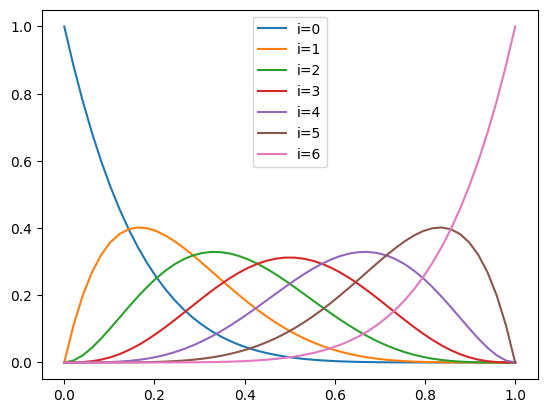

In [8]:
import scipy.special
def Bernstein(i,n,x):
    for i in range(n+1):
        fun = scipy.special.comb(n,i)*x**i*(1-x)**(n-i)
        plt.plot(x,fun,label=f'i={i}')
    plt.legend()
    plt.show()
i = 0
n = 6
x = np.linspace(0,1)    
Bernstein(i,n,x)

In [40]:
# Ser rätt ut men är osäker på om träffsäkerheten är den rätta
def dBernstein(i,n,x):
    fun = scipy.special.comb(n,i)*x**i*(1-x)**(n-i)
    bi = scipy.special.comb(n,i)
    der_man = (i*x**(i-1))*(1-x)**(n-i)+(x**(i))*(n-i)*(1-x)**(n-i-1)*-1
    df = bi*der_man
    return df

def num_Bernstein(i,n,x):
    bi = scipy.special.comb(n,i)
    h = 0.01
    fun = ((x+h)**(i)*(1-x-h)**(n-i)-(x-h)**(i)*(1-x+h)**(n-i))/(2*h)
    numdf = bi*fun
    return numdf
def exakt(i,n,x):
    t, s, n, i, x = sp.symbols('t, s, n, i, x')
    fun = sp.binomial(n,i)*x**i*(1-x)**(n-i)
    df_ = sp.diff(fun, x)
    return df_
i = 3
n = 15
h = 0.01
num_Bernstein(i,n,np.sqrt(2)/2)
dBernstein(i,n,np.sqrt(2)/2) - exakt(i,n,np.sqrt(2)/2)
res = np.abs(dBernstein(i,n,np.sqrt(2)/2) - num_Bernstein(i,n,np.sqrt(2)/2))

np.float64(-6.314556967235994e-05)

## Example script: Taylor approximation

In the following exercises we discuss different types of approximations. 
The script below plots $f=\sin x$ and it's Taylor approximation $\tilde f$ truncated after $N$ terms. The figure is followed by a plot with the pointwise residual $E(x):=|\tilde f(x)-f(x)|$ of the approximation. We will reuse this script in order to  compute best approximations and Galerking approximations by performing few modifications to the code.



We write the Taylor approximation in the following form:
$$
\tilde f(x)=\sum_{j=0}^N c_j \psi_j(x)\,\,\,\text{with}\,\,\,
\psi_j(x):=x^{2j+1}
\,\,\,\text{and}\,\,\,c_j(x):=\frac{(-1)^j}{(2j+1)!}
$$
Study the script below so that you understand it. Particularly, plot the approximation for different $N$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(x):  
    return np.sin(x)

def psi(i,x):  
    return x**(2*i+1)

N=1

x  = np.linspace(-np.pi,np.pi,1001)
Ft = np.zeros(len(x))
F  = np.zeros(len(x))
E  = np.zeros(len(x))

c = np.zeros(N)

for j in range(N):
    c[j] = (-1.0)**(j)/(math.factorial(2*j+1))

for i in range(len(x)):
    F[i]  = f(x[i])
    Ft[i]  = 0.0
    for j in range(N):
        Ft[i] += c[j]*psi(j,x[i])
    E[i]  = np.abs(Ft[i]-F[i])

plt.plot(x, Ft,'-b')
plt.plot(x, F, '-k')
plt.axis([x[0], x[-1], -1.5, 1.5]) # [tmin, tmax, ymin, ymax]
plt.title("Taylor series $\sin(x)$")
plt.show()

plt.plot(x, E,'-k')
plt.title("Error: Taylor series $\sin(x)$")
plt.show()


## Best approximation

Consider a given set of functions $\left\{\psi_j(x)\right\}_{j=0}^{N}$, for $x\in I$.
We now turn into the best approximation $\tilde f(x)$ of a function $f(x)$ by using the $\psi_j(x)$. The best approximation $\tilde f(x)$ is written as 
$$\tilde f(x)=\sum_{j=0}^{N} c_j\psi_j(x),$$
where the coefficients $c_j$ are obtained from the condition
$$\int_I (f-\tilde f)\psi_i\,dx=0.$$

We use the following notation
$$M_{ij}=\int_I \psi_i\,\psi_j\,dx\,\,\,\text{and}\,\,\,b_i=\int_I f\,\psi_i\,dx.$$


### Exercise 5:

In this exercise we will derive exact formulas. It is a good idea to use tables of integrals.

**1)** Derive an explicit formula for computing the coefficients $c_j$.
Hint: substitute the representation $\tilde f$ into the best approximation condition and derive a system of equations with the $c_j$ as unknowns.

**2)** Let $f(x)=x$ for $x\in I:=[0,\pi]$. Find the best approximation $\tilde f$ given the functions $\{\psi_i\}=\{1,\sin x,\sin 2x\}$, by computing the coefficients $c_0,c_1,c_2$.

**2.1)** Using a table of integrals, show that the functions $\{\psi_i\}_{i=0}^{N}=\{\sin (i+1)x\}$ for $x\in I:=[0,\pi]$ satisfy the orthogonality condition $M_{ij}=0$ for $j\neq i$. 
Notice that in this case, the resulting linear system contains a diagonal system matrix $\mathbf M$.


**2.2)** Use the orthogonality property for $\{\psi_i\}_{i=0}^{N}=\{\sin (i+1)x\}$ and write down an expression for each coefficient $c_i$. Using a table of integrals compute the $b_i$ for $f=x$. Plot the best approximation for $N=1,2,5,10,20$.

**3)** Let $f(x)=\sin \pi x$ for $x\in I:=[0,1]$. Find the best approximation $\tilde f$ given the functions $\{\psi_i\}=\{1,x,x^2\}$ by computing the coefficients $c_0,c_1,c_2$. 

**3.1)** Consider the functions $\{\psi_i\}_{i=0}^{N}=\{x^i\}$. 
(a) Is this set of functions orthogonal for $x\in I$? Motivate your answer. 
(b) Let $f(x)=\sin \pi x$ for $x\in I:=[0,1]$. Use a table of integrals to compute the $b_i$ and write down an expression for each coefficient $c_i$. 
(c) Plot the best approximation for $N=1,2,5,10$.

**3.2)** In the script below we repeat the task **3.1** but the entries $M_{ij}$ and $b_i$ are computed by using numerical integration. Study the script so that you understand what has been done.
Compare your results for the exact entries $M_{ij},\,\,b_i$ and $c_i$ against the numerical values given below and write down your observations. 

**3.3)** Finally, study the behavior of the pointwise error and condition numbers by increasing $N$ and write down your observations. Why is it important to check the condition number when solving linear systems numerically?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate

def f(x):  
    return np.sin(np.pi*x)

def psi(i,x):  
    return x**i

N=3

x  = np.linspace(0.0,1.0,1001)
Ft = np.zeros(len(x))
F  = np.zeros(len(x))
E  = np.zeros(len(x))

M = np.zeros((N, N))
b = np.zeros(N)
c = np.zeros(N)


for i in range(0, N):
    b[i] = scipy.integrate.quad(lambda x: f(x)*psi(i,x), 0.0, 1.0, epsabs=1E-9, epsrel=1E-9)[0]
    for j in range(0, N):
        M[i,j] = scipy.integrate.quad(lambda x: psi(i,x)*psi(j,x), 0.0, 1.0, epsabs=1E-9, epsrel=1E-9)[0]

# print(M)

c  = np.linalg.solve(M,b)
cn = np.linalg.cond(M)

print('Coefficients in best approx:',c)
print('Condition number of matrix M: ',cn)

for i in range(len(x)):
    F[i]  = f(x[i])
    Ft[i]  = 0.0
    for j in range(N):
        Ft[i] += c[j]*psi(j,x[i])
    E[i]  = np.abs(Ft[i]-F[i])

plt.plot(x, Ft,'-b')
plt.plot(x, F, '-k')
plt.axis([x[0], x[-1], -0.1, 1.1]) # [tmin, tmax, ymin, ymax]
plt.title("Best approximation $\sin(x)$")
plt.show()

plt.plot(x, E,'-k')
plt.title("Error: Best approximation $\sin(x)$")
plt.show()

### Exercise 6:

For this exercise we require numerical integration. For this we employ `scipy.integrate.quad` and `lambda` functions introduced in Computer lab 1. For solution of linear systems we use `numpy.linalg.solve`. 

**1)** Now, use your implementation using `Sinfun(i,x)` corresponding to 
$$\psi_i(x)=\sin((i+1)\pi x),\,\,i=0,1,\ldots,N.$$
Compute the best approximation to the exact solution of the Poisson equation (1) stated in Computer lab 2. The elements $M_{ij}$ and $b_i$ should be computed using numerical integration.
Perform the following tests:
For **(a)** $\sigma=1$ and **(b)** $\sigma=5$ generate individual plots.
Each figure should present plots with the exact solution $u(x)$ and best approximation $\tilde u(x)$ computed for $N=1,5,10$. 

**1.1)** Generate a plot for cases **(a,b)** but now plot $E(x)=|\tilde u(x)-u(x)|$.
Discuss your results by comparing the plots obtained in **(a,b)**. For which $\sigma$ is $\tilde u$ closer to $u$? 
What happens to $E(x)$ for larger $\sigma$?

## Variational formulation and Galerking approximation to BVPs

We now turn into the variational formulation of the models listed in the **test cases**.
For this, (a) introduce a test function $v$ satisying the same boundary conditions as $u$, (b) take the product of the ODE and $v$, (c) integrate the resulting expression over the domain of interest $I$, (d) integrate by parts the term involving higher derivatives of $u$ and (e) substitute appropriate boundary conditions.

We use the following notation
$$M_{ij}=\int_I \psi_i\,\psi_j\,dx,\,\,\,A_{ij}=\int_I \psi'_i\,\psi'_j\,dx\,\,\,\text{and}\,\,\,b_i=\int_I f\,\psi_i\,dx.$$ 

### Exercise 7:
In this exercise consider the test cases: **(1)** Poisson's equation, **(2)** Advection diffusion and **(3)** Helmholtz equation. We derive for each case the corresponding variational formulation and derive a Galerkin approximation scheme by following the steps below:

**a)** Introduce a test function $v$ and derive a variational formulation for the problems **(1-3)**. 

**b)** Consider the known set of global basis functions $\{\psi_i\}_{i=0}^{N}$ satisfying $\psi_i(0)=\psi_i(1)=0$. From the variational formulation in **(a)** derive the Galerkin approximation of the solution to this BVP.

**c)** Derive a system of equations from the variational formulation that defines the Galerkin approximation to the ODE assuming that the functions $\{\psi_i\}_{i=0}^{N}$ are known.


### Exercise 8:
Implement a numerical strategy for approximating the solutions to the BVPs given in the **test cases** by using Galerkin methods. Particularly, we use the variational formulations derived in exercise 7.

**1)** Use your implementation for the global basis functions $\psi_i(x)$ satisfying $\psi_i(0)=\psi_i(1)=0$ based on the $B_i^n(x)$. Compute Galerkin approximations $\hat u$ for the Advection-diffusion problem (2) using numerical integration.

Perform the following tests:
For **(a)** $d=0.25$ and **(b)** $d=0.01$ generate individual plots.
Each plot should contain the exact solution $u(x)$ and Galerkin approximations $\hat u(x)$ computed for $N=1,5,10$. 

**1.1)** Generate a plot for **(a,b)** but now plot $E(x)=|\hat u(x)-u(x)|$.
Discuss your results by comparing the plots obtained in **(a,b)**. For what $d$ is $\hat u$ closest to $u$? 
What happens to $E(x)$ for small $d$?